# Import libraries

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [112]:
iris = pd.read_csv("E:\IRIS.csv")

In [113]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [114]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


##### there are no null values. so data can be processed

In [115]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [116]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# EDA with IRIS

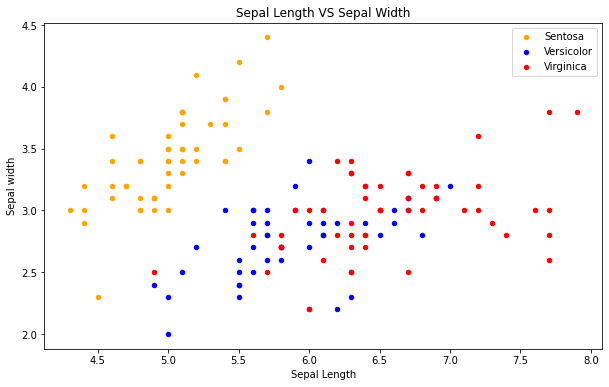

In [117]:
#Sepal Length vs Sepal Width

fig = iris[iris.species == 'Iris-setosa'].plot(kind = 'scatter', 
                                               x = 'sepal_length', 
                                               y = 'sepal_width',
                                               color = 'orange',
                                               label = 'Sentosa')

iris[iris.species == 'Iris-versicolor'].plot(kind = 'scatter', 
                                               x = 'sepal_length', 
                                               y = 'sepal_width',
                                               color = 'blue',
                                               label = 'Versicolor', ax = fig)


iris[iris.species == 'Iris-virginica'].plot(kind = 'scatter', 
                                               x = 'sepal_length', 
                                               y = 'sepal_width',
                                               color = 'red',
                                               label = 'Virginica', ax = fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal width")
fig.set_title("Sepal Length VS Sepal Width")
fig = plt.gcf() 
#gcf() GCF stands for Get Current Figure. plt. gcf() allows you to get a reference to the current figure when using pyplot.we need gcf for below inces code
fig.set_size_inches(10,6)
plt.show()

1) The above graph shows the relationship between Sepal Length and Sepal Width of differnt species of flowers.

2) Now, we will check the replationship between Petal Lenth and Petal Width.

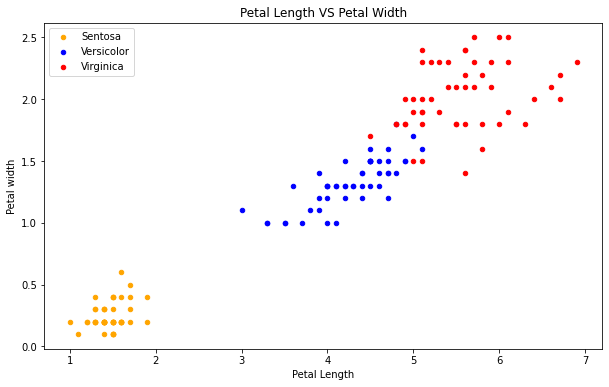

In [118]:
#Petal Length vs Petal Width

fig = iris[iris.species == 'Iris-setosa'].plot(kind = 'scatter', 
                                               x = 'petal_length', 
                                               y = 'petal_width',
                                               color = 'orange',
                                               label = 'Sentosa')

iris[iris.species == 'Iris-versicolor'].plot(kind = 'scatter', 
                                               x = 'petal_length', 
                                               y = 'petal_width',
                                               color = 'blue',
                                               label = 'Versicolor', ax = fig)

iris[iris.species == 'Iris-virginica'].plot(kind = 'scatter', 
                                               x = 'petal_length', 
                                               y = 'petal_width',
                                               color = 'red',
                                               label = 'Virginica', ax = fig)

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal width")
fig.set_title("Petal Length VS Petal Width")
fig = plt.gcf() 
#gcf() GCF stands for Get Current Figure. plt. gcf() allows you to get a reference to the current figure when using pyplot.we need gcf for below inces code
fig.set_size_inches(10,6)
plt.show()

1) We can see that petal features are giving a better cluster division compared to the Sepal features.

2) This is an indication that Petals can help in better and accurate Predictions over the Sepal.

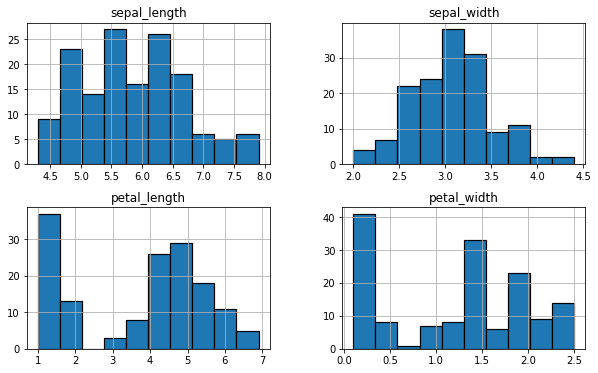

In [119]:
# Now, let us see how length and width are distributed

iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

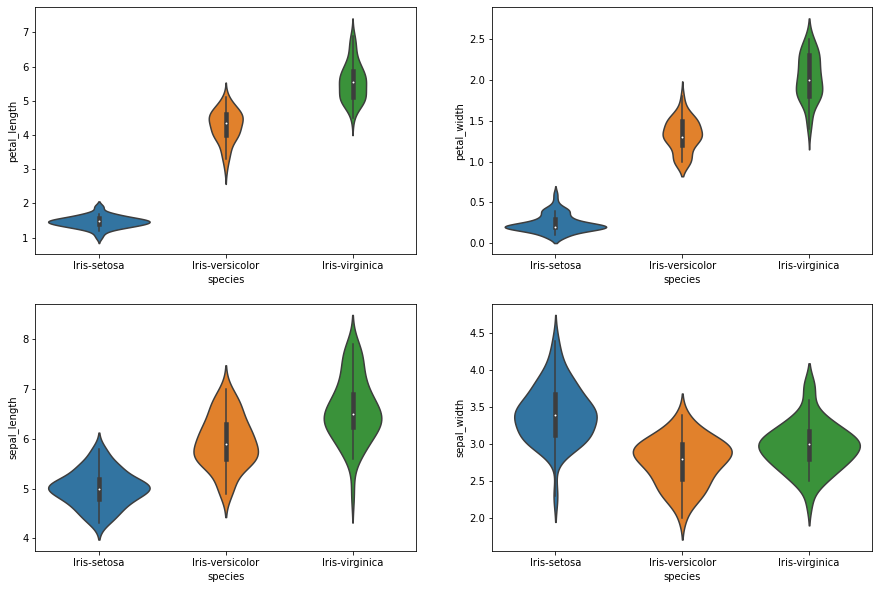

In [120]:
# Let us see Petal Length vs Petal Width vary according to their species.
#volin plot is the combination of box plot and density plot.
# it shows the distribution shape of the data.

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.violinplot(x = 'species', y = 'petal_length', data = iris)

plt.subplot(2,2,2)
sns.violinplot(x = 'species', y = 'petal_width', data = iris)

plt.subplot(2,2,3)
sns.violinplot(x = 'species', y = 'sepal_length', data = iris)

plt.subplot(2,2,4)
sns.violinplot(x = 'species', y = 'sepal_width', data = iris)

1) the violin plot shows the density of the length and the width in the species.

2) The thinner part denotes the less density whereas the fatter part denotes the high density.

The given problem is the classificaton problem. Thus we will be using the classification algorithms to build a model.

* Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data.

* Regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

In [121]:
#importing all the necessary packages to use the various classification algorithms.

from sklearn.linear_model import LogisticRegression #for Logistic regression algorithms
from sklearn.model_selection import train_test_split  #to split the dataset for training and testing

from sklearn.neighbors import KNeighborsClassifier #for K nearest neighbours
from sklearn import svm #for Support vector machine
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [122]:
iris.shape

(150, 5)

1) Now, when we train any algorithm, the number of features and their correlation plays an important role.

2) If there are features and many of the features are highly correlated, then training an algorithm with all the features will reduce the accuracy.

3) Thus, feature selction should be done carefully. 

4) The number of features are less. However, correlation has to be find out. 

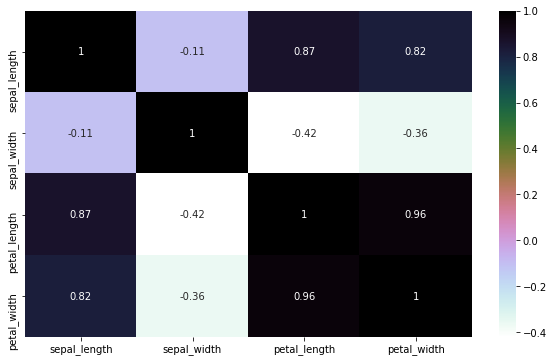

In [123]:
plt.figure(figsize = (10, 6))
sns.heatmap(iris.corr(), annot = True, cmap = 'cubehelix_r')
#draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

Observation--------->

1) Sepal Width and Sepal Legth are not correlated but Petal Length and Petal Width are highly correlated.

2) First, we will use all the features for training the algorithm and check the accuracy.

3) Then we will use 1 Petal feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated.

4) Thus we can have variance in the dataset which may help in better accuracy. 

### Steps To Be followed When Applying an Algorithm

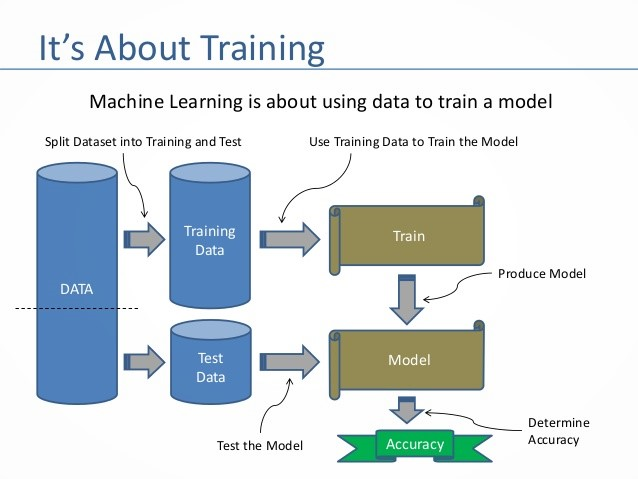

1) Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

2) Select any algorithm based on the problem (classification or regression) whatever you feel may be good.

3) Then pass the training dataset to the algorithm to train it. We use the .fit() method

4) Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.

5) We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [124]:
#Splitting the data into training and testing dataset

train, test = train_test_split(iris, test_size = 0.3)
#the attribute test_size divides the dataset into 70% training data and 30% testing dataset
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [125]:
#taking training data features
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

#taking testing data feature
train_y = train.species

#taking test data feature
test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

#output value of test data
test_y = test.species

In [126]:
#lets check the train and test dataset
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
131,7.9,3.8,6.4,2.0
20,5.4,3.4,1.7,0.2
31,5.4,3.4,1.5,0.4
142,5.8,2.7,5.1,1.9
46,5.1,3.8,1.6,0.2


In [127]:
test_X.head()

,sepal_length,sepal_width,petal_length,petal_width
138,6.0,3.0,4.8,1.8
120,6.9,3.2,5.7,2.3
4,5.0,3.6,1.4,0.2
8,4.4,2.9,1.4,0.2
69,5.6,2.5,3.9,1.1


In [128]:
#Output of the training data

train_y.head()

131    Iris-virginica
20        Iris-setosa
31        Iris-setosa
142    Iris-virginica
46        Iris-setosa
Name: species, dtype: object

In [129]:
#SVM(Support vector machine)

model = svm.SVC()#select the algorithm
model.fit(train_X, train_y)#train the model using training input and output data

prediction = model.predict(test_X)#predict the outcome using testing input

#pass the actual and predicted output and the actual output value to the model
#check the accuracy
print("The accuracy of SVM is :", metrics.accuracy_score(prediction, test_y))

The accuracy of SVM is : 0.9777777777777777


SVM is giving good accuracy. We will continue to check with the accuracy of different models. 

We will follow the same steps as above for training various machine learning models.

In [130]:
#Logistic Regression

model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


Logistic Regression is giving good accuracy. We will continue to check with the accuracy of different models.

In [131]:
#Decision Tree

model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9111111111111111


In [132]:
#K-Nearest Neighbours

model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


Let's check the accuracy for various values of n for K-Nearest nerighbours

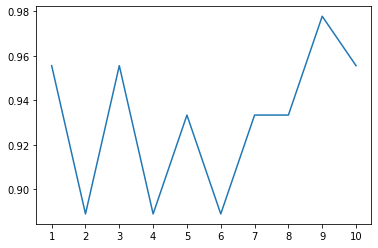

Accuracies for different values of n are: [0.95555556 0.88888889 0.95555556 0.88888889 0.93333333 0.88888889
 0.93333333 0.93333333 0.97777778 0.95555556]


In [133]:
a_index=list(range(1,11))
a = pd.Series()
m = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(m)
plt.show()
print('Accuracies for different values of n are:',a.values)

Above is the graph showing the accuracy for the KNN models using different values of n.

We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

#### Creating Petals And Sepals Training Data

In [134]:
petal = iris[['petal_length', 'petal_width', 'species']]
sepal = iris[['sepal_length', 'sepal_width', 'species']]

In [135]:
#petals
train_p, test_p = train_test_split(petal, test_size = 0.3, random_state = 0)

train_x_p = train_p[['petal_width', 'petal_length']]
train_y_p = train_p.species

test_x_p = test_p[['petal_width', 'petal_length']]
test_y_p = test_p.species


#sepals
train_s, test_s = train_test_split(sepal, test_size = 0.3, random_state = 0)

train_x_s = train_s[['sepal_width', 'sepal_length']]
train_y_s = train_s.species

test_x_s = test_s[['sepal_width', 'sepal_length']]
test_y_s = test_s.species

In [136]:
#SVM

model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [137]:
# Logistic Regression

model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [138]:
#Dexision Tree

model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [139]:
# K-Nearest Neighbours

model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


Observations------------------------>

1) Using Petals over Sepal for training the data gives a much better accuracy.

2) This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.